In [ ]:
matplotlib的通常引入约定是：

In [1]:
import matplotlib.pyplot as plt

In [ ]:
在Jupyter中运行%matplotlib notebook（或在IPython中运行%matplotlib），就可以创建一个简单的图形：

In [2]:
import pandas as pd
import numpy as np

In [6]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

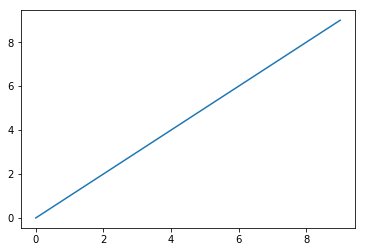

In [8]:
plt.plot(data)

In [ ]:
虽然seaborn这样的库和pandas的内置绘图函数能够处理许多普通的绘图任务，但如果需要自定义一些高级功能的话就必须学习matplotlib API。

In [ ]:
@Figure和Subplot

In [ ]:
matplotlib的图像都位于Figure对象中。你可以用plt.figure创建一个新的Figure：

In [50]:
fig = plt.figure(figsize=(12,9)) # figsize是plt.figure的一个选项，它用于确保当图片保存到磁盘时具有一定的大小和纵横比

In [27]:
# plt.figure返回一个Figure对象

In [ ]:
"不能通过空Figure绘图"。必须用add_subplot创建一个或多个subplot才行：

In [34]:
ax1 = fig.add_subplot(2, 2, 1)

In [ ]:
这行代码的意思是：图像（figure）应该是 2*2 的（即最多4张图），且当前选中的是4个subplot中的第一个（"子图编号从1开始"）。
如果再把后面两个subplot也创建出来，最终得到的图像如图：

In [36]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

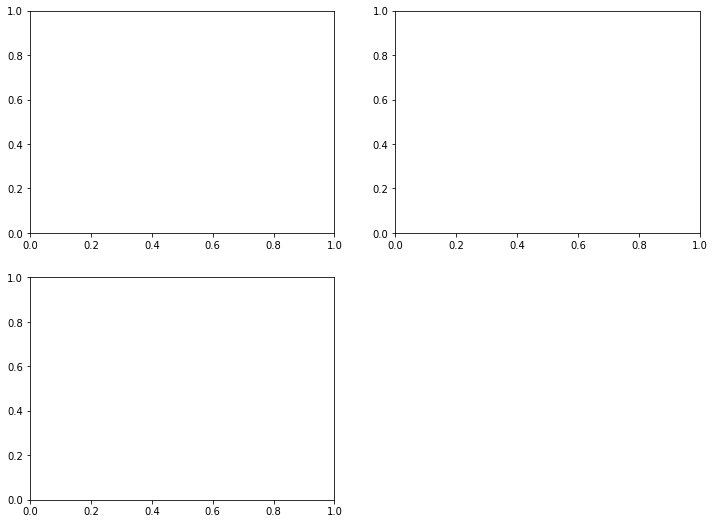

In [37]:
fig

In [ ]:
提示：使用Jupyter notebook有一点小小的不同（naunce），即每个单元（cell）重新执行后，图形会被"重置"。
因此，对于复杂的图形，你必须将所有的绘图命令存在一个小窗里。

In [ ]:
这里，我们运行同一个小窗里的所有命令：

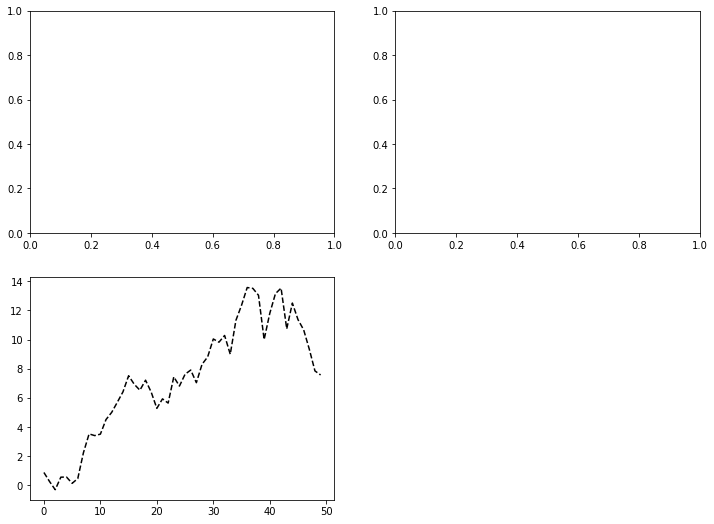

In [52]:
fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--') # "k--"是一个线型选项，用于告诉matplotlib绘制黑色虚线图

In [ ]:
如果这时执行一条绘图命令（如plt.plot(np.random.randn(50).cumsum(), 'k--')），
matplotlib就会在最后一个用过的subplot（如果没有则创建一个）上进行绘制，"隐藏创建figure和subplot的过程"。

In [44]:
# 上面那些由fig.add_subplot所返回的对象是AxesSubplot对象：
ax1

In [53]:
# 直接调用AxesSubplot的实例方法就可以在subplot里画图了：
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

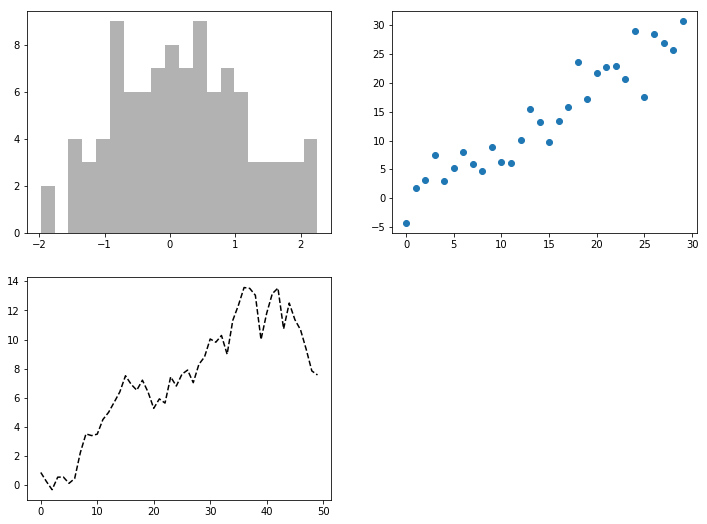

In [54]:
fig

In [ ]:
创建包含subplot网格的figure是一个非常常见的任务。
matplotlib有一个更为方便的方法plt.subplots，它可以创建一个新的Figure，并返回一个含有已创建的subplot对象的NumPy数组：

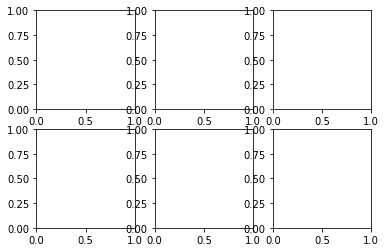

In [56]:
fig, axes = plt.subplots(2, 3)

In [59]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5a3f855f8>,
      dtype=object)

In [ ]:
这是非常实用的，因为可以轻松地对axes数组进行索引，就好像是一个二维数组一样

In [65]:
# 例如：
axes[0, 2]

In [ ]:
你还可以通过sharex和sharey指定subplot应该具有相同的X轴或Y轴。在比较相同范围的数据时，这也是非常实用的，
否则，matplotlib会自动缩放各图表的界限。

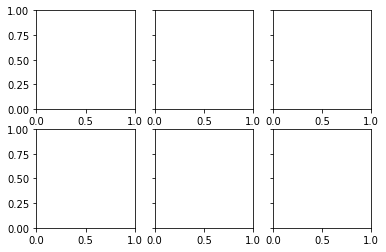

In [67]:
fig, axes = plt.subplots(nrows=2, ncols=3, sharey=True)

In [ ]:
@调整subplot周围的间距

In [ ]:
默认情况下，matplotlib会在subplot外围留下一定的边距，并在subplot之间留下一定的间距。
间距跟图像的高度和宽度有关，因此，如果你调整了图像大小（不管是编程还是手工），间距也会自动调整。
利用Figure的subplots_adjust方法可以轻而易举地修改间距，此外，它也是个顶级函数：

In [ ]:
# official docstring of pandas：
The parameter meanings (and suggested defaults) are::

  left  = 0.125  # the left side of the subplots of the figure
  right = 0.9    # the right side of the subplots of the figure
  bottom = 0.1   # the bottom of the subplots of the figure
  top = 0.9      # the top of the subplots of the figure
  wspace = 0.2   # the amount of width reserved for blank space between subplots,
                 # expressed as a fraction of the average axis width
  hspace = 0.2   # the amount of height reserved for white space between subplots,
                 # expressed as a fraction of the average axis height


In [ ]:
wspace和hspace用于控制宽度和高度的百分比，可以用作subplot之间的间距。
下面是一个简单的例子，其中我将间距收缩到了0：

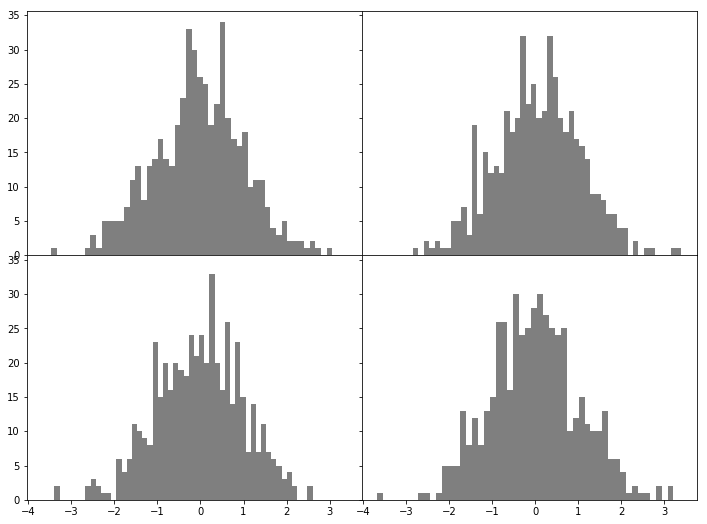

In [76]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12, 9))
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

In [ ]:
不难看出，其中的轴标签重叠了。
matplotlib不会检查标签是否重叠，所以对于这种情况，你只能自己设定刻度位置和刻度标签。后面几节将会详细介绍该内容。

In [ ]:
@颜色、标记和线型

In [ ]:
matplotlib的plot函数接受一组X和Y坐标，还可以接受一个"表示颜色和线型的字符串缩写"。
例如，要根据x和y回执绿色虚线，你可以执行如下代码：
ax.plot(x, y, 'g--')

In [ ]:
这种在"一个字符串中"指定颜色和线型的方式非常方便。
在实际中，如果你是用代码绘图，你可能不想通过处理字符串来获得想要的格式。
通过下面这种更为明确的方式也能得到同样的效果：
ax.plot(x, y, linestyle='--', color='g')

In [ ]:
常用的颜色可以使用颜色缩写，你也可以指定颜色码（例如，'#CECECE'）。
你可以通过查看plot的文档字符串查看所有线型的合集（在IPython和Jupyter中使用plot?）。

In [ ]:
线图可以使用标记强调数据点。
因为matplotlib可以创建连续线图，在点之间进行插值，因此有时可能不太容易看出真实数据点的位置。

In [ ]:
标记也可以放到格式字符串中，但标记类型和线型必须放在颜色后面：

In [88]:
from numpy.random import randn

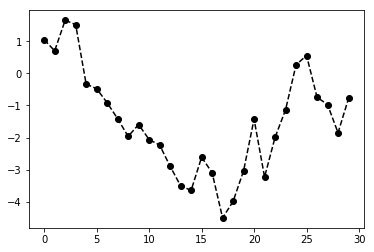

In [79]:
plt.plot(randn(30).cumsum(), 'ko--')
# randn(30)返回一个大小为30的1d-matrix（可视为Series），pd.df.cumsum按索引递归返回该索引上的累积和
# 即s[0]=s[0], s[1]=s[0]+s[1], s[2]=s[1]+s[2], ...

In [ ]:
# 还可以将其写成更为明确的形式：
# plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

In [92]:
pd.DataFrame.cumsum?
Signature: pd.DataFrame.cumsum(self, axis=None, skipna=True, *args, **kwargs)

Docstring:
Return cumulative sum over a DataFrame or Series axis.
Returns a DataFrame or Series of the same size containing the cumulative
sum.
返回DataFrame或Series轴上的累积和。
返回包含累积和的相同大小的DataFrame或Series。

Parameters
----------
axis : {0 or 'index', 1 or 'columns'}, default 0
    The index or the name of the axis. 0 is equivalent to None or 'index'.
skipna : boolean, default True
    Exclude NA/null values. If an entire row/column is NA, the result
    will be NA.
*args, **kwargs :
    Additional keywords have no effect but might be accepted for
    compatibility with NumPy.
    其他关键字无效，但可能会与NumPy兼容。

Returns
-------
cumsum : Series or DataFrame

In [90]:
在线型图中，"非实际数据点"默认是按"线性方式"插值的。可以通过drawstyle选项修改：

In [96]:
data = np.random.randn(30).cumsum()

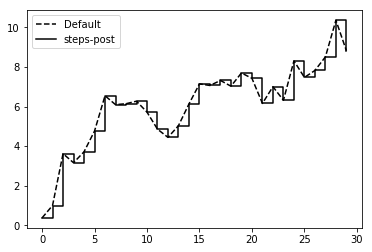

In [123]:
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend()

In [120]:
这里，因为我们传递了label参数到plot，我们可以创建一个plot图例，指明每条使用plt.legend的线。

In [ ]:
@刻度、标签和图例
# Ticks, Labels, and Legends

In [ ]:
对于大多数的图表装饰项，其主要实现方式有二：
    - 使用过程型的pyplot接口（例如，matplotlib.pyplot）
    - 更为面向对象的原生matplotlib API

In [ ]:
pyplot接口的设计目的就是交互式使用，含有诸如xlim、xticks和xticklabels之类的方法。它们分别控制图表的范围、刻度位置、刻度标签等。其使用方式有以下两种：
    - 调用时不带参数，则返回当前的参数值（例如，plt.xlim()返回当前的X轴绘图范围）
    - 调用时带参数，则设置参数值（例如，plt.xlim([0,10])会将X轴的范围设置为0到10）

In [ ]:
所有这些方法都是对当前或最近创建的AxesSubplot起作用的。它们各自对应subplot对象上的两个方法，
以xlim为例，就是ax.get_xlim和ax.set_xlim。
我更喜欢使用subplot的实例方法（因为我喜欢明确的事情，而且在处理多个subplot时这样也更清楚一些）。
当然你完全可以选择自己觉得方便的那个。

In [ ]:
@设置标题、轴标签、刻度以及刻度标签

In [ ]:
为了说明自定义轴，我将创建一个简单的图像并绘制一段随机漫步：

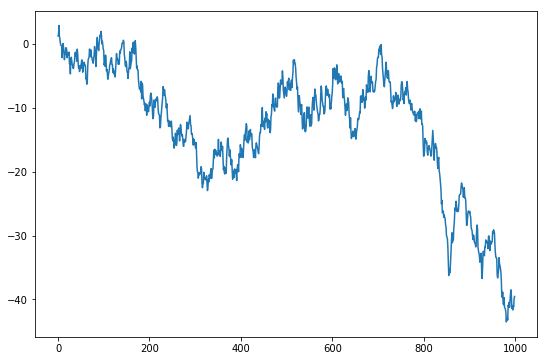

In [20]:
# 每个cell重新执行后，图形会被重置。所以对于复杂的图形，你必须将所有的绘图命令存在一个小窗里：
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(1, 1, 1) # add_plot返回AxesSubplot对象（The axe of the subplot）
ax.plot(np.random.randn(1000).cumsum())

In [21]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

In [22]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')

In [ ]:
rotation选项设定x刻度"标签倾斜"30度。
最后，再用set_xlabel为X轴设置一个名称，并用set_title设置一个标题：

In [23]:
ax.set_title('My first matplotlib plot')

Text(0.5,1,'My first matplotlib plot')

In [24]:
ax.set_xlabel('Stages')

Text(0.5,3.2,'Stages')

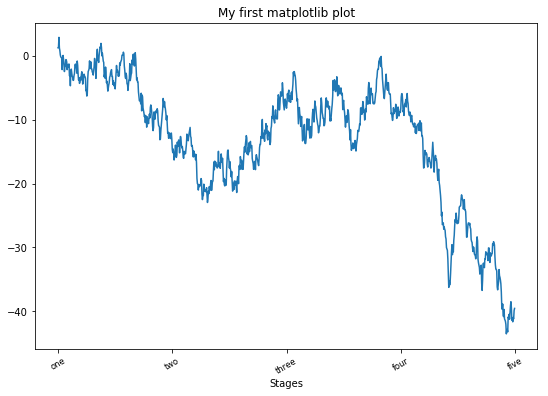

In [25]:
fig

In [ ]:
Y轴的修改方式与此类似，只需将上述代码中的x替换为y即可。

In [ ]:
轴的类有集合方法，可以批量设定绘图选项。前面的例子，也可以写为：
props = {
    'title': 'My first matplotlib plot'
    'xlabel': 'Stages'
}
ax.set(**props)

In [ ]:
@添加图例
# Adding Legends

In [ ]:
图例（legend）是另一种用于标识图表元素的重要工具。
添加图例的方式有多种。最简单的是在添加subplot的时候传入label参数：

In [26]:
from numpy.random import randn

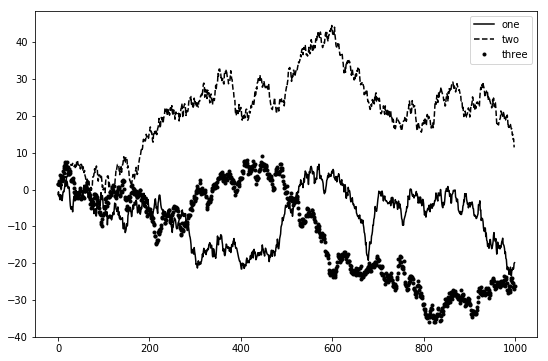

In [46]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(1, 1, 1) # 也可以直接写成 fig, ax = plt.subplots(1, 1)

ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

ax.legend(loc='best') # 作图需写在同一cell内，否则figure重置，无法显示图片内容

In [44]:
# 写在不同cell中，调用ax.legend()或plt.legend()自动创建图例：
ax.legend()

In [45]:
legend方法有几个其他的loc位置参数选项。可以查看文档字符串
        ===============   =============
        Location String   Location Code
        ===============   =============
        'best'            0
        'upper right'     1
        'upper left'      2
        'lower left'      3
        'lower right'     4
        'right'           5
        'center left'     6
        'center right'    7
        'lower center'    8
        'upper center'    9
        'center'          10
        ===============   =============

In [47]:
loc告诉matplotlib要将图例放在哪。
如果你不是吹毛求疵的话，"best"是不错的选择，因为它会选择最不碍事的位置。
要从图例中去除一个或多个元素，不传入label或传入label='nolegend'即可。（中文第一版这里把best错写成了beat）

In [ ]:
@注解以及在Subplot上绘图

In [ ]:
除标准的绘图类型，你可能还希望绘制一些子集的注解，可能是文本、箭头或其他图形等。
注解和文字可以通过text、arrow和annotate（注释）函数进行添加。
text可以将文本绘制在图表的指定坐标(x,y)，还可以加上一些自定义格式：
ax.text(x, y, 'Hello world!', family='monospace', fontsize=10)

In [ ]:
注解中可以既含有文本也含有箭头。

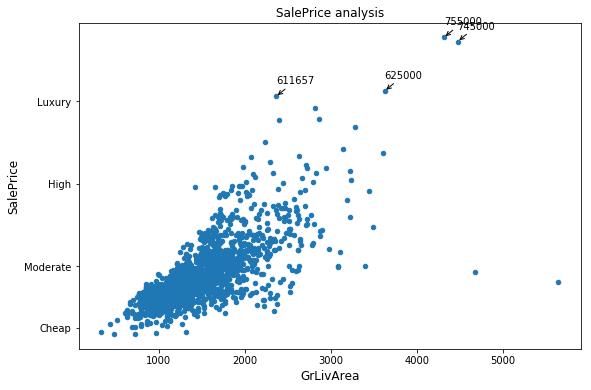

In [130]:
import seaborn as sns

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(1, 1, 1)

df_train = pd.read_csv('../my_kaggle_proj/House Prices: Advanced Regression Techniques/data/train.csv', index_col=0) # 以DataFrame的第一列（即'id'）作为索引

var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)

data.plot(ax=ax, x=var, y='SalePrice', kind='scatter', title='SalePrice analysis')

crisis_data = [
    (2364, '611657'),
    (3627, '625000'),
    (4316, '755000'),
    (4476, '745000')
]

for GLA, SP in crisis_data:
        ax.annotate(s=SP, xy=(GLA, int(SP)), xytext=(GLA, int(SP) + 50000),
                arrowprops=dict(arrowstyle='->'),
                horizontalalignment='left', verticalalignment='top')

ax.set_xlabel(xlabel=var, fontsize='large')
ax.set_ylabel(ylabel='SalePrice', fontsize='large')
ax.set_yticks([50000, 200000, 400000, 600000])
ax.set_yticklabels(['Cheap', 'Moderate', 'High', 'Luxury'])

fig.savefig('test_figure_9.1.png', dpi=400, bbox_inches='tight')

In [ ]:
@将图表保存到文件

In [ ]:
利用plt.savefig可以将当前图表保存到文件。该方法相当于Figure对象的实例方法savefig。
例如，要将图表保存为SVG文件，你只需输入：
plt.savefig('figpath.svg')

In [ ]:
文件类型是通过"文件扩展名"推断出来的。因此，如果你使用的是.pdf，就会得到一个PDF文件。
我在发布图片时最常用到两个重要的选项是dpi（控制“每英寸点数”分辨率）和bbox_inches（可以剪除当前图表周围的空白部分）。
要得到一张带有最小白边且分辨率为400DPI的PNG图片，你可以：
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

In [ ]:
savefig并非一定要写入磁盘，也可以写入任何文件型的对象，比如BytesIO：
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

In [ ]:
@matplotlib配置

In [ ]:
matplotlib自带一些配色方案，以及为生成出版质量的图片而设定的默认配置信息。
幸运的是，几乎所有默认行为都能通过一组全局参数进行自定义，它们可以管理图像大小、subplot边距、配色方案、字体大小、网格类型等。
一种Python编程方式配置系统的方法是使用rc方法。

In [ ]:
例如，要将全局的图像默认大小设置为10×10，你可以执行：
plt.rc('figure', figsize=(10, 10))

In [ ]:
rc的第一个参数是希望自定义的对象，如'figure'、'axes'、'xtick'、'ytick'、'grid'、'legend'等。
其后可以跟上一系列的关键字参数。一个简单的办法是将这些选项写成一个字典：
font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size'   : 'small'}
plt.rc('font', **font_options)

In [ ]:
要了解全部的自定义选项，请查阅matplotlib的配置文件matplotlibrc（位于matplotlib/mpl-data目录中）。
如果对该文件进行了自定义，并将其放在你自己的.matplotlibrc目录中，则每次使用matplotlib时就会加载该文件。

In [ ]:
下一节，我们会看到，seaborn包有若干内置的绘图主题或类型，它们使用了matplotlib的内部配置。